In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Nos conectamos al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Datos
net_tot = pd.read_csv("/content/drive/My Drive/Sakura/Global_SF.csv")
net_tot=net_tot[['Source','Target']]
net_tot.head()

,Source,Target
0,AATF,CDKN1D
1,AATF,MYCB
2,AATF,TP53
3,ABL1,BCL2B
4,ABL1,BCL6AA


In [4]:
len(net_tot)

6412

In [5]:
# Transformamos la lista de interacciones en un grafo
Net = nx.from_pandas_edgelist(net_tot, 'Source', 'Target', create_using=nx.DiGraph())

In [6]:
print(nx.is_directed(Net))

True


In [7]:
# Observamos la información basica del grafo
print('Number of nodes', len(Net.nodes))
print('Number of edges', len(Net.edges))

Number of nodes 2531
Number of edges 6412


In [ ]:
nx.average_clustering(Net)

0.064910071583891

In [8]:
G2 = Net.to_undirected()

# Se convierte el grafo direccionado en un grafo 2 sin dirección

In [9]:
components = nx.connected_components(G2) # encuentra todos los componentes conexos de G2
largest_component = max(components, key=len) # encuentra el componente más grande
NumCC=nx.number_connected_components(G2) # total de componentes conexos en G2



*   A connected component is a group of nodes where you can reach any node from any other node within the group by following the edges.
*   El componente más grande del grafo esta basado en un número de nodos que contiene
*   Elemento de lista




In [11]:
NumCC # hay 19 componentes conexos

24

In [12]:
[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]
# calcula el tamaño (número de nodos) de todos los componentes conexos en orden descendente

[2481, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]

In [13]:
Indegree_dict = dict(Net.in_degree(Net.nodes()))
# calcula el in-degree de cada nodo del grafo y lo guarda en un diccionario llamado Indegree_dict
nx.set_node_attributes(Net, Indegree_dict, 'degree')
# agrega la información de grados como un atributo a los nodos

In [14]:
import operator
sorted_Indegree = sorted(Indegree_dict.items(), key=operator.itemgetter(1), reverse=True)
# ordena los nodos basados en el in-degree en orden descendente

In [15]:
for d in sorted_Indegree[:15]:
    print(d)

# imprime la lista de nodos en orden descendente

('CDKN1D', 78)
('CCND1', 62)
('MYCB', 52)
('PTGS2B', 43)
('LOC103023785', 43)
('BCL2B', 39)
('TP53', 33)
('MMP9', 29)
('E2F1', 28)
('MMP2', 28)
('JUND', 26)
('PPARG', 26)
('CCND2A', 24)
('ERBB2', 24)
('EGFRA', 24)


In [16]:
Outdegree_dict = dict(Net.out_degree(Net.nodes()))
nx.set_node_attributes(Net, Outdegree_dict, 'degree')
sorted_Outdegree = sorted(Outdegree_dict.items(), key=operator.itemgetter(1), reverse=True)

In [20]:
for d in sorted_Outdegree[:60]:
    print(d)

('JUND', 321)
('SP1', 312)
('FOXO1B', 203)
('RFX3', 199)
('RELA', 169)
('LOC103030154', 141)
('TP53', 112)
('SP3A', 105)
('E2F1', 103)
('ETS1', 90)
('NFKB1', 82)
('STAT3', 81)
('ARNT2', 80)
('CREB1B', 80)
('ETV6', 77)
('MYCB', 68)
('HIF1AB', 64)
('HDAC1', 63)
('ESR1', 62)
('EGR1', 62)
('PPARG', 59)
('YY1B', 59)
('USF1', 54)
('SPI1B', 48)
('TFDP2', 45)
('CTNNB1', 44)
('TFAP2A', 44)
('MEIS1B', 42)
('EP300A', 41)
('SMAD3B', 40)
('MYBL2B', 38)
('GATA1A', 37)
('KLF4', 36)
('CEBPA', 35)
('FOSAB', 35)
('SIRT1', 34)
('USF2', 32)
('ISL1A', 32)
('LOC103029501', 31)
('MAX', 31)
('IRF1B', 30)
('FOXA1', 29)
('MYOD1', 29)
('MITFB', 28)
('NR5A1A', 28)
('STAT6', 26)
('PPARAB', 25)
('LEF1', 25)
('SOX2', 25)
('POU2F1B', 25)
('NR1D4A', 25)
('SRFB', 24)
('MEF2AA', 24)
('HSF1', 24)
('VDRA', 24)
('DNMT1', 23)
('NRF1', 23)
('PAX6A', 23)
('FOXA2', 23)
('RB1', 23)


In [ ]:
M =  nx.adjacency_matrix(Net)
# Get the sum of each column (indegree) and convert to a 1D array
# crea una matriz de adyacencia representa la red

indegrees = M.sum(axis=0).flatten()  # Use flatten() instead of A1
# Get the sum of each row (outdegree) and convert to a 1D array
# calcula el in-degree de todos los nodos al sumar los valores de cada columna de la matriz
# transforma los datos a 1D


outdegrees = M.sum(axis=1).flatten()  # Use flatten() instead of A1
# calcula el out-degree de todos los nodos al sumar los valores de cada columna de la matriz


in_degrees = Net.in_degree()
out_degrees = Net.out_degree()


*   An adjacency matrix is a way to represent a
graph using a matrix where rows and columns correspond to nodes, and a value of 1 at a specific row and column indicates a connection between the corresponding nodes.

* Distribución de in-degrees: cuantos nodos tienen un in-degree específico


In [ ]:
indegrees=indegrees.astype(np.int64) #convierte los datos a enteros
outdegrees=outdegrees.astype(np.int64)
indegree_distribution = np.bincount(indegrees) #calcula la distribución de in-degrees
outdegree_distribution = np.bincount(outdegrees)

In [ ]:
xdata = np.array(range(len(indegree_distribution)))
#crea un array en donde cada valor representa un nivel de in-degree
#Básicamente está enumerando: 0, 1, 2, ..., N. Donde N es el número de nodos de la red

ydata = np.array(indegree_distribution)
#crea un array de NumPy. Cada valor es cuántos nodos tienen ese in-degree.

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
#Crea un DataFrame de pandas para organizar los datos
dataset = dataset[~(dataset == 0).any(axis=1)]
#elimina las filas donde hay algún 0 en cualquiera de las columnas
dataset.head()

,xdata,ydata
1,1,1110
2,2,461
3,3,229
4,4,143
5,5,97


In [ ]:
x=dataset[['xdata']].to_numpy(float)
y=dataset[['ydata']].to_numpy(float)
x.astype(float);
y.astype(float);

In [ ]:
dflog=np.log(dataset[['xdata','ydata']])
#Toma el logaritmo natural (ln) de los datos para trabajar en escala log-log.
new_df = dflog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
#Eliminar infinitos y NaNs
#Elimina los puntos donde xdata o ydata eran cero (porque log(0) da -inf).

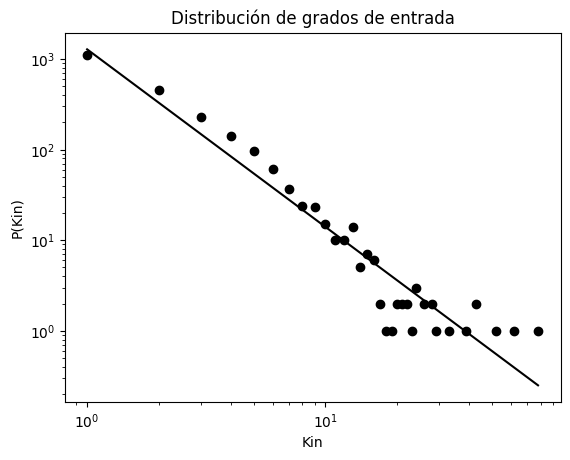

In [ ]:
logx = new_df.xdata
logy = new_df.ydata
coeffs = np.polyfit(logx,logy,deg=1)
#Ajusta una línea recta a los datos en escala logarítmica


poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
#poly(np.log(x)) te da la recta ajustada en escala log.
#Luego np.exp(...) regresa a la escala normal, y grafica la curva ajustada sobre los datos originales.

plt.loglog(x,y,'ko')  #gráfico del plot
plt.ylabel('P(Kin)')
plt.xlabel('Kin')
plt.title('Distribución de grados de entrada')
plt.loglog(x,yfit(x),'k', label=r'$y=3995x^{-3.34}$')
#plt.loglog(x,yfit(x),'k')
#plt.legend()
plt.savefig('Grados_in.png',dpi=300)
plt.show()

In [ ]:
#Se repite el mismo proceso para el outdegree

xdata = np.array(range(len(outdegree_distribution)))
ydata = np.array(outdegree_distribution)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]

In [ ]:
x=dataset[['xdata']].to_numpy(float)
y=dataset[['ydata']].to_numpy(float)
x.astype(float);
y.astype(float);

In [ ]:
dflog=np.log(dataset[['xdata','ydata']])
new_df = dflog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

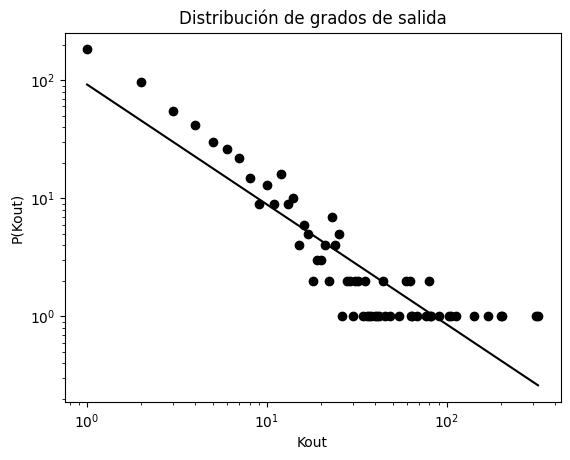

In [ ]:
logx = new_df.xdata
logy = new_df.ydata
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
plt.loglog(x,y,'ko')
plt.ylabel('P(Kout)')
plt.xlabel('Kout')
plt.title('Distribución de grados de salida')
#plt.loglog(x,yfit(x),'k',label=r'$y=594.82x^{-1.47}$')
plt.loglog(x,yfit(x),'k')
#plt.legend()
plt.savefig('OutputDegree.png',dpi=300)
plt.show()

In [ ]:
#analiza la distribución de grado total (in y out)
from scipy import optimize
NetDia = nx.degree_histogram(Net) #construye un histograma de grados
xdata = np.array(range(len(NetDia)))
ydata = np.array(NetDia)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()

np.polyfit(x,y,1)
#performs a basic linear regression (polynomial of degree 1) to fit a power-law to the data

x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)
yerr = 0.2 * y #un error del 20% del valor observado de y es util para ponderar el ajuste
logx = np.log10(x)
logy = np.log10(y)
logyerr = yerr / y
np.polyfit(logx,logy,1)
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]

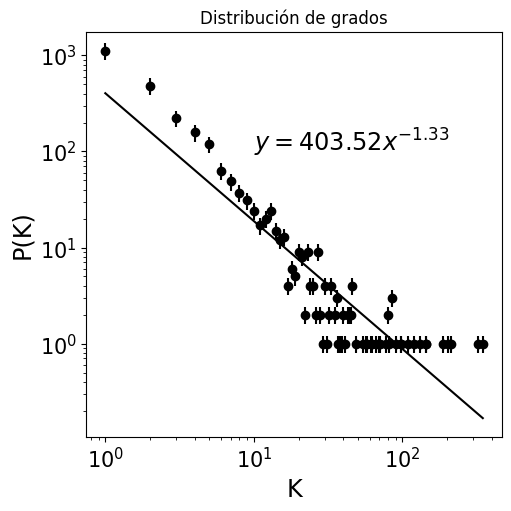

In [ ]:
import matplotlib.pyplot as plt
index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5,5))

ax.loglog(x, powerlaw(x, amp, index), color='k')
ax.errorbar(x, y, yerr=yerr, fmt='ko')  # Data
ax.text(10, 100, '$y = %5.2f x^{%5.2f}$' % (amp,index), fontsize='xx-large')
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
ax.set_xlabel('K', fontsize='xx-large')
ax.set_ylabel('P(K)', fontsize='xx-large')
ax.set_title('Distribución de grados')
#plt.savefig('Modeloarticulo.png', dpi=300)
plt.show()


In [ ]:
n = 2531  # nodes
m = 6412  # edges
seed = 20160  # seed random number generators for reproducibility

RanNet = nx.gnm_random_graph(n, m, seed=seed)
print('Number of nodes', len(RanNet.nodes))
print('Number of edges', len(RanNet.edges))

Number of nodes 2531
Number of edges 6412


In [ ]:
from scipy import optimize
NetDia = nx.degree_histogram(RanNet)
xdata = np.array(range(len(NetDia)))
ydata = np.array(NetDia)

dataset = pd.DataFrame({'xdata': xdata, 'ydata': ydata}, columns=['xdata', 'ydata'])
dataset = dataset[~(dataset == 0).any(axis=1)]
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
np.polyfit(x,y,1)
x=dataset.xdata.tolist()
y=dataset.ydata.tolist()
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)
yerr = 0.2 * y
logx = np.log10(x)
logy = np.log10(y)
logyerr = yerr / y
np.polyfit(logx,logy,1)
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]

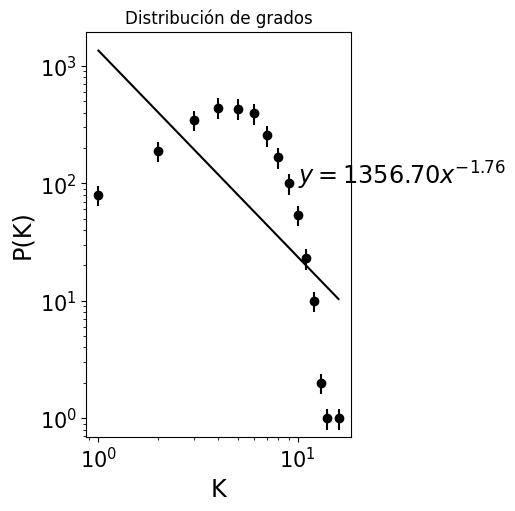

In [ ]:
index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(5,5))

ax.loglog(x, powerlaw(x, amp, index), color='k')
ax.errorbar(x, y, yerr=yerr, fmt='ko')  # Data
ax.text(10, 100, '$y = %5.2f x^{%5.2f}$' % (amp,index), fontsize='xx-large')
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
ax.set_xlabel('K', fontsize='xx-large')
ax.set_ylabel('P(K)', fontsize='xx-large')
ax.set_title('Distribución de grados')
#plt.savefig('Modeloarticulo.png', dpi=300)
plt.show()